In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [14]:
F_SAMPLE = 44100
#freqs = linspace(1, 5000, 128) * 2 * pi / F_SAMPLE
freqs = logspace(-1, 4, 128) * 2 * pi / F_SAMPLE
# phs = 2 * pi * (rand(freqs.size) * 2 - 1)
phs = zeros_like(freqs)
ccdData = ones_like(freqs)
chunk = arange(40960)
offs = 1
freqsv, chunkv = meshgrid(freqs, chunk)

<IPython.core.display.Javascript object>


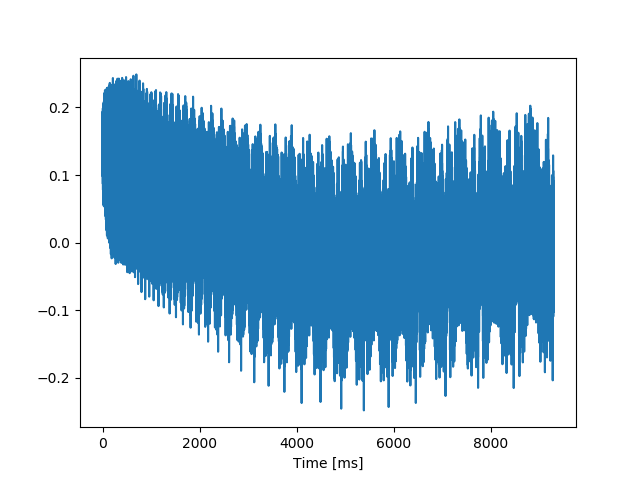

Text(0.5,0,'Time [ms]')

In [15]:
samples = []
for i in range(10):
    dat = ccdData * sin(freqsv * (offs+chunkv) + phs)
    samples.append(mean(dat, 1))
    offs += chunk.size
samples = hstack((samples))
plot(linspace(0, samples.size/F_SAMPLE, samples.size)*1000, samples)
xlabel("Time [ms]")